# Filter dan Jendela

Terakhir kali kita melihat bagaimana kita bisa mendapatkan respons impuls dari filter low pass yang ideal, yaitu fungsi sinc. Masalah dari respon impuls ini adalah, bahwa respon ini bersifat non-kausal, dan kita juga tidak dapat membuatnya bersifat kausal karena dimulai dari minus tak terhingga (kita tidak dapat menambahkan penundaan yang tak terhingga).

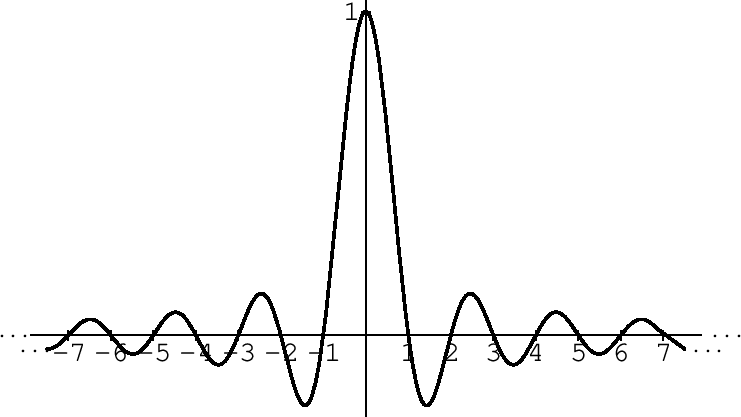

Asumsikan kita ingin memiliki filter low pass Finite Impulse Response (FIR) kausal, yang berarti respons impuls dimulai pada waktu 0 dan hanya mencakup jumlah sampel yang terbatas, n = 0,..., L-1, untuk panjang L. (Perhatikan bahwa filter FIR tidak memiliki korespondensi dalam domain analog, filter analog selalu memiliki respons impuls yang tak terbatas, IIR)

Bagaimana kita mendesain filter ini sedemikian rupa sehingga menjadi “mirip” dengan filter yang ideal? (Karena kita tidak bisa mendapatkan filter yang ideaon)

Contoh: Rancanglah filter anti-aliasing untuk konversi laju sampling: Sinyal asli berasal dari CD dengan laju sampling 44,1 kHz, sehingga bandwidth audio sekitar 20 kHz, dan kami ingin menurunkannya ke laju sampling 22 kHz, misalnya untuk komputer Mac. Untuk dapat menurunkannya, pertama-tama kita harus melakukan low pass filter, misalnya pass-band harus dari 0 hingga 9 kHz, dan stop-band, untuk menghindari aliasing pada frekuensi di atas 11 kHz, harus dari 11 kHz hingga maksimum (di sini: 22,05 kHz). Karena kita tidak memiliki filter yang ideal, kita perlu menyertakan band “transisi”, di sini dari 9kHz ke 11 kHz, untuk membiarkan filter “bertransisi” dari pass band ke stop band, dengan pelemahan menengah.

Aliasing adalah sesuatu yang mudah dirasakan oleh telinga, oleh karena itu kami ingin memiliki setidaknya 60 dB pelemahan dari 11 kHz ke atas. Passband dapat menerima beberapa riak dalam respons frekuensi, misalnya ± 2 dB (sesuai dengan sekitar ± 25% dalam tegangan). Rentang frekuensi dari 9 kHz hingga 11 kHz adalah yang disebut band transisi, yang memberikan ruang bagi filter untuk membangun redamannya dari 0 hingga 60 dB, untuk memastikan bahwa filter telah memiliki 60 dB pada frekuensi 11 kHz. Dengan cara ini kita dapat merumuskan persyaratan untuk “kemiripan” filter kita, meskipun kita tahu bahwa kita tidak dapat mencapai yang optimal (pendekatan praktis).

Pendekatan pertama (mungkin naif) adalah dengan mendefinisikan kemiripan sebagai kesalahan kuadrat dari respons frekuensi filter FIR kita terhadap respons frekuensi ideal yang diberikan (biasanya ini berarti magnitudo respons frekuensi). Ini memiliki keuntungan menjadi sangat sederhana secara matematis. Ini berarti tujuan kita adalah meminimalkan kesalahan kuadrat ini. Anggaplah respons frekuensi yang diinginkan adalah Hd(ω), dan respons frekuensi (nyata) dari filter FIR kausal kita adalah H(ω). Maka kesalahan kuadrat e adalah

![Screenshot 2024-05-01 221426.png](<attachment:Screenshot 2024-05-01 221426.png>)
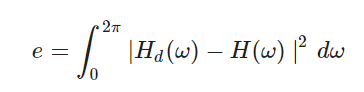

Kita ingin membuat kesalahan e sekecil mungkin. Perhatikan bahwa kita memerlukan integral di sini karena sinyal domain frekuensi adalah kontinu, karena sinyal domain waktu tidak periodik (hanya dengan demikian transformasi Fourier akan menjadi diskrit terhadap frekuensi). Tetapi di sini kita memiliki fungsi sinc dengan jangkauan tak terbatas dari waktu ke waktu. Perhatikan bahwa karena hal ini kita juga tidak dapat menerapkan Transformasi Fourier Diskrit, karena ini dibuat untuk sinyal periodik dengan periode yang terbatas (DFT biasanya diterapkan hanya pada periode yang terbatas ini). Tetapi Discrete Time Fourier Transform adalah untuk sinyal waktu diskrit dengan periode tak terbatas.

Kita perlu meminimalkan kesalahan kuadratik e untuk menemukan perkiraan terbaik dengan filter FIR. Kita tidak dapat menyelesaikan masalah ini dalam domain frekuensi, tetapi kita dapat menyelesaikan formulasi yang setara dalam domain wakt

Untuk mendapatkan hal ini, kami menggunakan apa yang disebut Teorema Parseval, yang menyatakan bahwa kekuatan sinyal (jumlah kuadrat magnitudo) adalah sama dalam domain waktu dan frekuensi (hal ini berlaku untuk Transformasi Fourier Waktu Diskrit dan juga DFT).

![Screenshot 2024-05-01 221807.png](<attachment:Screenshot 2024-05-01 221807.png>)
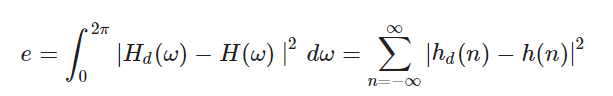

Keindahan di sini adalah sekarang kita mendapatkan sebuah jumlah, yang sekarang dapat kita hitung lebih mudah (ingat: kita ingin mendapatkan h(n)).

Untuk filter rendah ideal kita, hd(n) adalah fungsi sinc. Untuk mendapatkan filter kausal, kita sudah memperbolehkan pergeseran waktu nd untuk respon impuls ideal (menggunakan filter FIR kita h(n) membuat kausalitas menjadi mungkin). Memasukkan ini ke dalam persamaan di atas menghasilkan:

![Screenshot 2024-05-01 221813.png](<attachment:Screenshot 2024-05-01 221813.png>)
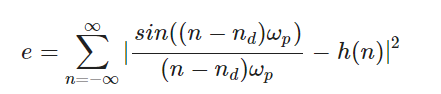

Bagaimana kita harus memilih h(n) dan penund n nd untuk mendapatkan kesalahan kuadratik e seminimal mungkin untuk panjang L yang diberikan dari h(n)?

Dengan panjang L, kita perlu menentukan koefisien L h(n) dan parameter peundaannd .

Agar solusinya lebih mudah dilihat, kita bisa membagi jumlah tersebut menjadi 2 bagian, satu untuk panjang h(n) dan sisa:

![Screenshot 2024-05-01 221820.png](<attachment:Screenshot 2024-05-01 221820.png>)
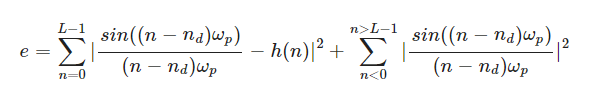

Kedua ruas bernilai positif, jadi untuk meminimalkan e kita harus meminimalkan kedua ruas. Untuk meminimalkan ruas kanan, kita hanya memiliki nd. Kita bisa memilih nd sedemikian rupa sehingga hanya nilai terkecil yang muncul di sana, dan nilai terbesar dari hd tidak “terlihat” oleh ruas kanan, dan ditutupi oleh h(n) di ruas kiri. Kita dapat membayangkan penjumlahan sebelah kiri sebagai sebuah “jendela persegi panjang”, di mana kita dapat menggeser fungsi sinc di atas fungsi jendela ini untuk mendapatkan h(n).

Jendela persegi panjang adalah sebuah fungsi yang memiliki nilai 1 di dalam panjang jendela dan nilai 0 di luar panjang jendela. Jumlah yang terbatas dapat dibayangkan sebagai hasil dari mengalikan fungsi sinc yang tak terbatas dengan jendela persegi panjang ini, dan kemudian menghitung jumlahnya, yang kemudian menjadi terbata

Tujuannya di sini adalah untuk menggeser fungsi sinc, dengan menggunakan penundaan nd, sehingga jendela untuk h(n) “melihat” nilai terbesar dari fungsi sinc. Amati bahwa hal ini akan menghasilkan respons impuls yang berdekatan. Dengan menggunakan rumus di atas, juga memungkinkan untuk memilih nilai terbesar dari fungsi sinc untuk h(n) (maksimum dan minimum), untuk respon impuls yang tidak bersebelahan, yang akan menghasilkan galat kuadrat yang lebih kecil untuk koefisien L! (Pertanyaan: Bagaimana respon frekuensi yang dihasilkan?).

Asumsikan L = 2, maka kita memiliki filter dengan 2 koefisien. Dua nilai terbesar dalam fungsi sinc berada di sekitar pusat, di sekitar nol, oleh karena itu kita ingin memilih nd = 0,5 (penundaan setengah sampel), sehingga pusat yang baru berada di sekitar n = 0,5, dan penjumlahan di sebelah kanan hanya “melihat” nilai yang lebih kecil. Secara umum kita ingin memilih nd = (L-1)/2, yang berarti kita menggeser maksimum dari fungsi sinc tepat di tengah jendela kita untuk h(n) Apa yang kita lakukan dengan sisi kiri (di dalam jendela kita)? Kita pilih h(n) yang identik dengan hd(n), dan jumlah sebelah kiri (dengan jendela) menjadi nol!

Dengan cara ini kita mendapatkan “resep” sederhana untuk mendesain filter FIR dengan kesalahan kuadrat minimum: Ambil bagian tengah dari fungsi sinc (atau respon impuls ideal hd), dan jendelanya dengan apa yang disebut jendela “persegi panjang” (karena memiliki bentuk persegi panjang dalam waktu atau ruang. Di dalam penjumlahan untuk h(n), jendela yang dibayangkan ini memiliki nilai 1, dan di luarnya memiliki nilai 0

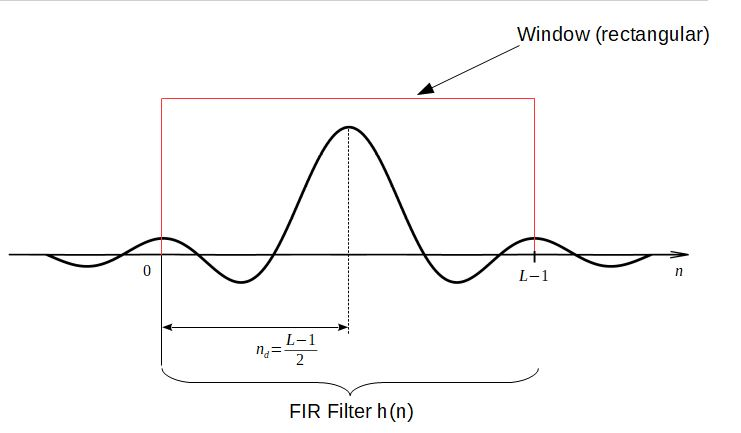

Fungsi jendela yang dibayangkan ini akan menjadi lebih menarik jika kita memodifikasi nilai dari 1 ke nilai lainnya. Kita dapat melihat: Filter FIR = fungsi Sinc dikalikan dengan jendela persegi panjang.

Amati: Jika kita hanya menggunakan bagian terbatas dari fungsi Sinc sebagai filter, secara implisit kita sudah menerapkan jendela persegi panjang. Oleh karena itu, tidak perlu menerapkannya secara eksplisit lag

Perkalian jendela persegi panjang dengan respons impuls ideal dalam domain waktu menjadi konvolusi DTFT jendela persegi panjang dengan respons frekuensi ideal dalam domain frekuensi. Dengan cara ini kita dapat melihat hasilnya dalam domain frekuensi. Pada dasarnya, respons frekuensi ideal (dari fungsi sinc) “dikaburkan” dengan mengonvolusi dengan DTFT dari fungsi jendela. Idealnya, DTFT jendela ini harus berupa impuls pada frekuensi nol, karena dengan demikian konvolusi tidak akan mengubah respons frekuensi ideal. Namun, hal ini berarti jendela yang sangat panjang dalam domain waktu. Kita memiliki jendela persegi panjang yang terbatas dalam domain waktu yang menjadi fungsi Sinc lain dalam domain frekuensi, sangat berbeda dari pulsa pada frekuensi nol!

Perhatikan: Semakin panjang jendela dalam domain waktu, semakin sempit pula fungsi Sinc-nya dalam domain frekuensi, dan semakin mirip dengan sebuah impuls. Oleh karena itu, untuk filter yang lebih baik kita memerlukan jendela yang lebih panjang!

Mari kita lihat apa yang sebenarnya kita miliki, di iPython, dengan jendela:

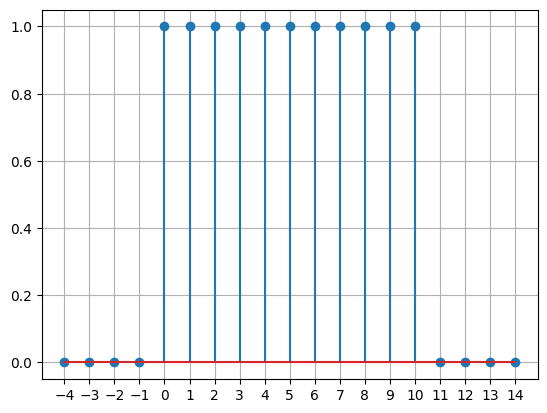

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L=11
h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0)
plt.figure()
plt.stem(np.arange(-4, L+4, step=1), h)
plt.xticks(np.arange(-4, L+4, step=1))
plt.grid();

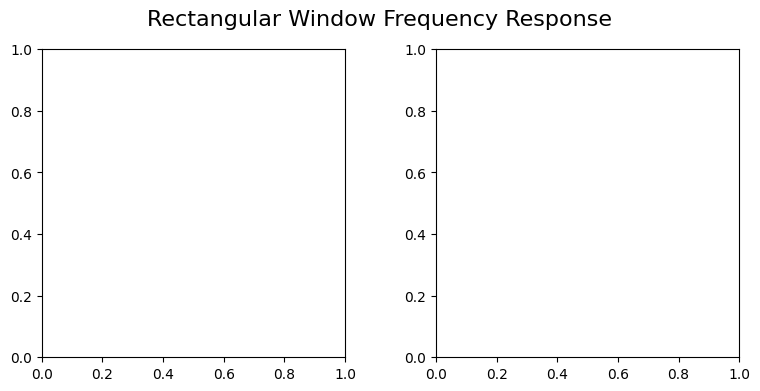

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), Checkbox(value=False, description=…

In [3]:
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import argrelextrema
import scipy.signal as signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Rectangular Window Frequency Response', fontsize=16)
plt.subplots_adjust(wspace=0.3)

@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),unwrap=False)
def plot_recWindow_H(L=16, unwrap=False):
    h = np.concatenate((np.ones(L),np.zeros(4)),axis=0)
    omega, H =signal.freqz(h[:-4],worN=512)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H)/np.abs(H).max())
    p3dB=np.max(H_dB)-3
    p3dBIndex= np.max(np.where(H_dB >= p3dB))
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    ax1.clear()
    ax1.plot(omega, H_dB)
    ax1.plot(wp, Hp,'go')
    ax1.plot((0, wp), (Hp, Hp), 'k--') 
    ax1.plot((wp, wp), (-80, Hp), 'k--') 
    ax1.set_ylim((-80,H_dB.max()+5))
    ax1.annotate(r'$\omega$={:.2f}$\pi$,-3dB'.format(wp/np.pi), xy=(wp, Hp), xytext=(wp+0.2*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H), np.greater)[0][0]
        ax1.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--') 
        ax1.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]), 
                    xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(omega[side_lobe]+0.2*np.pi, -5),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax1.plot(omega[side_lobe], H_dB[side_lobe],'go')
        
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax1.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax1.grid(True)
    ax1.set_xlabel(r'$\omega$ [rad/sample]')
    ax1.set_ylabel(r'Normalized Magnitude [dB]')
    
    
    ax2.clear()
    phase=np.angle(H,deg=True)
    if unwrap:
        phase=np.unwrap(phase)
    ax2.plot(omega,phase)
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax2.grid(True)
    ax2.set_xlabel(r'$\omega$ [rad/sample]')
    ax2.set_ylabel(r'Phase [degrees]')

Di sini kita dapat melihat bahwa ini jauh dari impuls pada frekuensi nol. Malah agak lebar dan juga redamannya tidak terlalu tinggi, sekitar -15 hingga -20 dB. Kami berharap bahwa filter low pass yang kami hasilkan akan “mewarisi” sifat-sifat ini melalui konvolusi dalam domain frekuensi.

Lebar “pass band” atau lebar lobus utama dari fungsi jendela kita akan menentukan lebar pita transisi dari filter yang dihasilkan, dan redaman stop band dari jendela akan menentukan redaman stop band yang dihasilkan dari filter kit

Hal ini menunjukkan bahwa fungsi window membentuk karakteristik utama dari filter FIR yang dihasilkan!

Contoh: Ambil contoh filter downsampling kita yang seharusnya mengurangi frekuensi mulai dari 11 kHz, pada laju sampel 44,1 kHz. Kita ingin memiliki attenuasi -60 dB di pita henti. Oleh karena itu, kita mendapatkan frekuensi ternormalisasi untuk awal pita henti kita sebagai:=ωs:

![Screenshot 2024-05-01 230645.png](<attachment:Screenshot 2024-05-01 230645.png>)
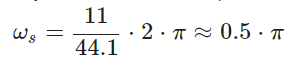

Oleh karena itu, respons frekuensi yang kita inginkan adalah 1 antara frekuensi 0 dan ωs (atau lebih baik: antara -ωs hingga ωs untuk menyertakan sumbu frekuensi negatif). Sekarang ambil kebalikan DTFT dari respons frekuensi ideal yang diinginkan Hd(ω) untuk mendapatkan respons impuls ideal hd(n). Karena pada awalnya kita mengasumsikan sebuah filter ideal, kita mengatur akhir pita lewatan ωc identik dengan awal pita henti, ωc = ωs :

![Screenshot 2024-05-01 230700.png](<attachment:Screenshot 2024-05-01 230700.png>)
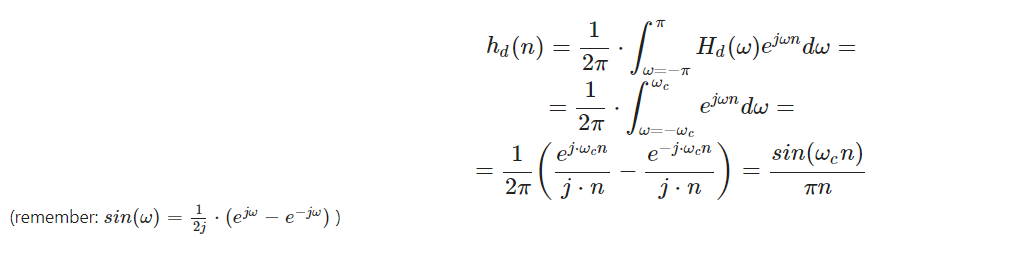

### Pendekatan Filter Rendah Ideal Menggunakan Jendela Persegi dan Tundaan

Kita sudah melihat, bahwa respons impuls dari filter low pass yang ideal adalah:

![Screenshot 2024-05-01 230707.png](<attachment:Screenshot 2024-05-01 230707.png>)
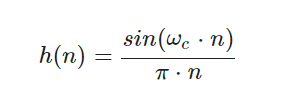

Dengan memotong respon impuls (mengalikan dengan jendela persegi) sehingga memiliki panjang L dan menerapkan tundaan nd=(L−1)/2, kita memiliki:

![Screenshot 2024-05-01 230712.png](<attachment:Screenshot 2024-05-01 230712.png>)
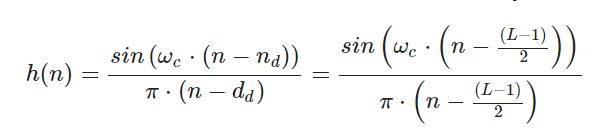

In [5]:
from sympy import sin, symbols, simplify, pi, lambdify, limit

wc_s = symbols('\omega_c')
n_s, L_s = symbols('n L', integer=True)

n_d_s=(L_s-1)/2
h_n_s=sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s))
h_n_s

sin(\omega_c*(-L/2 + n + 1/2))/(pi*(-L/2 + n + 1/2))

In [6]:
h_0_s = limit(h_n_s,n_s,n_d_s)
h_0_s

\omega_c/pi

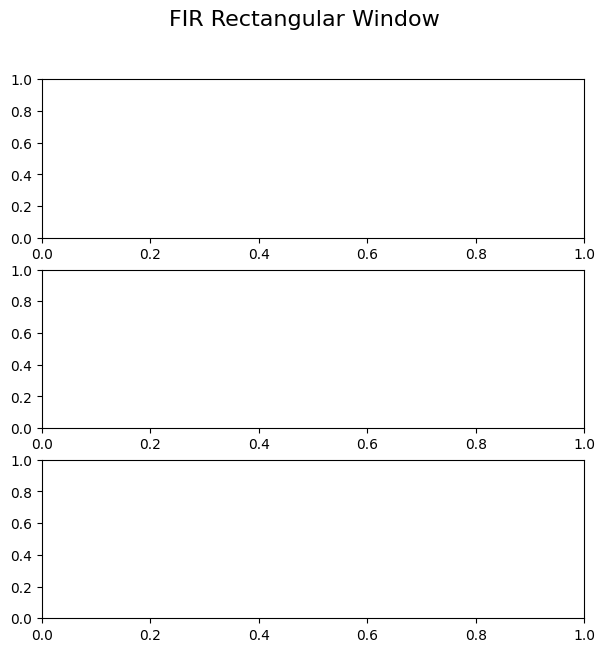

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), FloatSlider(value=0.5, description…

In [7]:
h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy')

fig1, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(7,7))
fig1.suptitle('FIR Rectangular Window', fontsize=16)
plt.subplots_adjust(wspace=0.3)


@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16), 
          wc=widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5), unwrap=False)
def plot_h(L=16, wc=0.5,unwrap=False):
    wc=wc*np.pi
    n=np.arange(L)
    n_d=n_d_s.subs(L_s,L).evalf()
    if L%2==0:
        h=h_n(wc,n,L)
    else:
        h=np.ones(L)
        for i in range(L):
            if i==n_d:
                h[i]=wc/np.pi
            else:
                h[i]=h_n(wc,i,L)
    ax1.clear()
    ax1.stem(h, use_line_collection=True)
    ax1.plot(h,'r--',alpha=0.4)
    ax1.set_title(r'Impulse Response')
    ax1.grid()
    
    omega, H =signal.freqz(h,worN=2048)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H))
    p3dB=-3
    p3dBIndex_down= np.max(np.where(H_dB >= p3dB))
    p3dBIndex_up= np.min(np.where(H_dB <= p3dB))
    print(H_dB[p3dBIndex_down])
    print(H_dB[p3dBIndex_up])
    if (np.abs(p3dB-H_dB[p3dBIndex_down]) >= np.abs(p3dB-H_dB[p3dBIndex_up])):
        p3dBIndex=p3dBIndex_up
    else:
        p3dBIndex=p3dBIndex_down
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    max_peak_ind=np.argmax(H_dB)
    
    ax2.clear()
    ax2.plot(omega, H_dB)
    ax2.plot(omega[max_peak_ind], H_dB[max_peak_ind],'go')
    ax2.plot((0, omega[max_peak_ind]), (H_dB[max_peak_ind], H_dB[max_peak_ind]), 'k--',alpha=0.5) 
    ax2.plot((omega[max_peak_ind], omega[max_peak_ind]), (-80, H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.annotate('$\omega_{{peak}}$={:.2f}$\pi$,{:.2f} dB'.format(omega[max_peak_ind]/np.pi,H_dB[max_peak_ind]), 
                 xy=(omega[max_peak_ind],H_dB[max_peak_ind]), xytext=(omega[max_peak_ind]+0.15*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4))
    ax2.plot(wp, Hp,'go')
    ax2.plot((0, wp), (Hp, Hp), 'k--', alpha=0.5) 
    ax2.plot((wp, wp), (-80, Hp), 'k--',alpha=0.5)
    ax2.set_ylabel(r'Magnitude [dB]')
    ax2.grid()
    ax2.set_ylim((-60,H.max()+5))
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax2.annotate(r'$\omega_{{-3dB}}$={:.2f}$\pi$,{:.2f} dB'.format(wp/np.pi,Hp), xy=(wp, Hp), xytext=(wp+0.15*np.pi, -10),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H[p3dBIndex:]), np.greater)[0][0]+p3dBIndex
        ax2.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--',alpha=0.5) 
        ax2.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]), 
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(0, -40),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax2.plot(omega[side_lobe], H_dB[side_lobe],'go')
        
    ax3.clear()
    phase=np.angle(H, deg=False)
    if unwrap:
        phase=np.unwrap(phase)
        print('Delay={:.2f}'.format(phase[p3dBIndex]/wp))
    ax3.plot(omega,phase)
    ax3.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax3.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax3.grid(True)
    ax3.set_xlabel(r'$\omega$ [rad/sample]')
    ax3.set_ylabel(r'Phase')
    ax3.plot(wp, phase[p3dBIndex],'go')
    ax3.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}'.format(wp/np.pi,phase[p3dBIndex]), 
                     xy=(wp, phase[p3dBIndex]), xytext=(0, -1),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    

Sekarang anggap kita ingin memiliki panjang filter L=16. Maka tundaan untuk membuat filter yang dihasilkan kausal adalah nd = (L−1)/2 = 7.5. Oleh karena itu, filter kita menjadi:

![Screenshot 2024-05-01 231103.png](<attachment:Screenshot 2024-05-01 231103.png>)
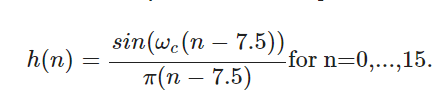

Inilah filter FIR kausal hasilnya dengan fungsi jendela persegi.

Pita lintas memiliki gelombang sekitar +/- 0,5 dB. 0,5 dB sesuai dengan faktor ![Screenshot 2024-05-01 231108.png](<attachment:Screenshot 2024-05-01 231108.png>) yang berarti hanya 6% overshoot atau undershoot, dan biasanya sudah cukup baik.

Namun, di sini kita juga dapat melihat bahwa filter ini mungkin memiliki attenuasi sekitar -10 dB pada frekuensi ternormalisasi 0.5⋅π, dan lobe sisi pertama hanya memiliki attenuasi sekitar -20 dB. Oleh karena itu, filter ini tidak memenuhi persyaratan kami untuk setidaknya attenuasi -60 dB mulai dari frekuensi ternormalisasi 0.5⋅π.

Untuk plot fasa: Kita memiliki tundaan nd=7.5 dengan filter kita. Karena ini adalah filter fase linear, kita harapkan fasa menjadi −7.5⋅ω. Kita dapat memverifikasi ini dalam plot kita, misalnya pada frekuensi ω=0.1⋅π, dalam plot kita di sumbu x 0.1. Dalam derajat kita dapatkan 7.5⋅0.1⋅π⋅180π=135. Ini adalah yang memang kita lihat secara kasar dalam plot.

Sekarang kita memiliki filter dengan kesalahan kuadrat minimum dibandingkan dengan ideal yang kita berikan. Tetapi apakah ini benar-benar yang kita inginkan?

Masalah yang kita dapatkan disebut "Fenomena Gibbs". Ini mengatakan bahwa kesalahan muncul sebagai gelombang pada magnitudo pita lintas dan pita henti. Bagian menariknya adalah, bahwa gelombang pada dekat tepi pita lintas dan pita henti tidak menjadi lebih kecil saat L menjadi lebih besar (kesalahan yang lebih kecil dalam pendekatan), tetapi mereka hanya menjadi lebih sempit! Ini adalah hasil dari konvolusi respon frekuensi ideal kita dengan fungsi sinc dari jendela persegi. Fungsi sinc ini hanya menjadi lebih sempit saat kita meningkatkan panjangnya L, tetapi tinggi gelombangnya tetap sama.

Ini berarti, kesalahan maksimum yang kita dapatkan tidak menjadi lebih kecil saat kita meningkatkan L! (yang buruk).

Perhatikan: Ukuran gelombang dekat tepi pita lintas dan pita henti hanya menjadi lebih sempit (sehingga luas yang berkurang dan oleh karena itu kesalahan kuadrat yang berkurang), tetapi tingginya tidak menjadi lebih kecil dengan meningkatnya L. Di sini mereka selalu tetap sekitar 0,1 di pita henti, yang sesuai dengan sekitar -20 dB! (Yang tidak akan mencukupi dalam contoh filter anti-aliasing kita.)

Untuk melihat bagaimana Fenomena Gibbs terjadi, kita dapat melihat skema kita dalam domain frekuensi:

Pada dasarnya kita mengalikan respon impuls ideal kita dengan jendela persegi. Dalam domain frekuensi, ini berarti konvolusi dari respon frekuensi ideal (dengan perubahan fase melalui tundaan nd) dengan respon frekuensi dari jendela persegi. Yang terakhir adalah fungsi sinc yang sempit, dengan gelombang yang sesuai di sisi lob utamanya. Dan gelombang-gelombang tersebut adalah yang muncul sebagai Fenomena Gibbs. Jika kita membuat jendela kita lebih panjang (L lebih besar), fungsi sinc menjadi lebih sempit, tetapi tinggi gelombang tidak berkurang, tetapi tetap konstan!

Sebenarnya dalam sebagian besar aplikasi, apa yang kita inginkan bukanlah meminimalkan kesalahan kuadrat, tetapi meminimalkan kesalahan maksimum! Pada dasarnya, kita memilih ukuran kesalahan yang salah.

Ini juga menyarankan modifikasi untuk menurunkan tinggi gelombang. Alih-alih menggunakan jendela persegi, kita bisa menggunakan jendela alternatif, yang memiliki gelombang lebih rendah dalam domain frekuensi.

Jendela yang umum digunakan adalah jendela cosine raised atau jendela sinus.
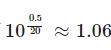